In [335]:

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PolynomialFeatures,RobustScaler,Normalizer
from sklearn.linear_model import Ridge,LinearRegression,Lasso,ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.metrics import *
from sklearn.model_selection import train_test_split,GridSearchCV,learning_curve, RandomizedSearchCV,KFold,cross_val_score
from sklearn.dummy import DummyRegressor
import pickle
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn import tree
import graphviz 

In [336]:
df = pd.read_csv("dataset_clear.csv")

In [337]:
feature = df.columns[0:-1]
target = 'charges'
X =df.drop(["charges","bmi"],axis=1)
y = df[target]



In [338]:
numerical_features = [
       'age','children'
       ]
categorical_features = [
       'sex' , 'smoker', 'region',"cat_bmi"
       ]



In [339]:


my_col_trans = ColumnTransformer([
    ("one_hot_encoder",OneHotEncoder(handle_unknown='ignore'),categorical_features),
])



In [340]:
preprocessor =make_pipeline(my_col_trans,PolynomialFeatures())



In [341]:
X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=True, random_state=25, train_size = 0.8,stratify=X[["smoker"]])

In [342]:
regressor = make_pipeline(preprocessor,tree.DecisionTreeRegressor())


In [343]:
# regressor.get_params()


In [344]:

parameters = {"pipeline__polynomialfeatures__degree":[1,2],"decisiontreeregressor__min_samples_leaf":[1,2,3,4,5,6,7,8,9,10,20,30,40,45,50,60,70,80,90,100,150,200],"decisiontreeregressor__min_samples_split":[2,3,4,5,6,7,8,9,10,20,30,40,45,50,60,70,80,90,100,150,200]}
randm_src = GridSearchCV(estimator=regressor, param_grid=parameters,scoring='r2',cv=5)
randm_src.fit(X_train, y_train)

regressor.set_params(**randm_src.best_params_)
print(randm_src.best_params_)
best=randm_src.best_params_

{'decisiontreeregressor__min_samples_leaf': 4, 'decisiontreeregressor__min_samples_split': 50, 'pipeline__polynomialfeatures__degree': 1}


In [345]:
cross_val_score(regressor, X_train, y_train, cv=5)

array([0.75395605, 0.77039729, 0.7408698 , 0.79424048, 0.71615539])

In [346]:
regressor.fit(X_train, y_train)
regressor.score(X_train, y_train)

0.7710800233916001

In [347]:

regressor.score(X_test, y_test)

0.7692841410855259

In [348]:
preprocessor.fit(X_train)
    
# Transform the training data using the preprocessor
X_test_pipe = preprocessor.transform(X_train)

# Get the names of the columns added by the OneHotEncoder
new_columns = preprocessor.get_feature_names_out()
new_columns = [w.replace('pipeline-1__', '') for w in new_columns]
new_columns = [w.replace('pipeline-2__', '') for w in new_columns]

# Convert the transformed data to a Pandas DataFrame
newdf = pd.DataFrame(X_test_pipe)

In [349]:
new_columns

['1',
 'one_hot_encoder__sex_female',
 'one_hot_encoder__sex_male',
 'one_hot_encoder__smoker_no',
 'one_hot_encoder__smoker_yes',
 'one_hot_encoder__region_northeast',
 'one_hot_encoder__region_northwest',
 'one_hot_encoder__region_southeast',
 'one_hot_encoder__region_southwest',
 'one_hot_encoder__cat_bmi_healthy',
 'one_hot_encoder__cat_bmi_morbid_obesity',
 'one_hot_encoder__cat_bmi_obesity',
 'one_hot_encoder__cat_bmi_overweight',
 'one_hot_encoder__cat_bmi_underweight']

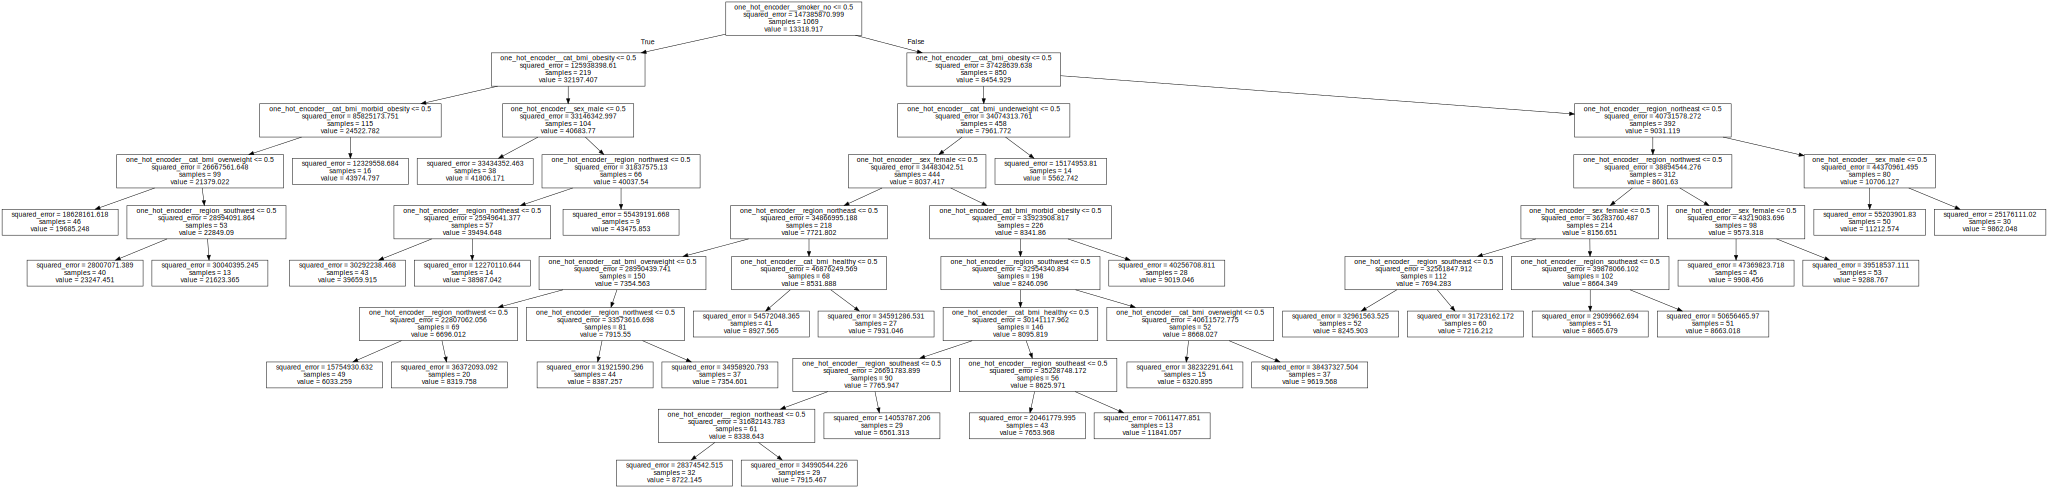

In [350]:
dot_data = tree.export_graphviz(regressor[-1], out_file=None,feature_names=new_columns) 
graph = graphviz.Source(dot_data)
graph.render("assurance",format='pdf') 
graph